In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [2]:
def drawMatrix(arr):
    height = arr.shape[0] * 10
    width = arr.shape[1] *10
    img = np.zeros((height,width),dtype=np.uint8)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            img[i*10:i*10+10,j*10:j*10+10] = arr[i,j]
    img[::10,...] = 200
    img[...,::10] = 200
    return img

In [3]:
src = 255.0 - np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                        [1,0,0,0,0,1,1,1,1,1,0,0,0,0,1],
                        [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                        [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                        [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                        [1,0,0,0,0,1,1,1,1,1,0,0,0,0,1],
                        [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])*255.0
# src = 255.0 - np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
#                         [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
#                         [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
#                         [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
#                         [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
#                         [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
#                         [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])*255.0
# src = np.ones((7,15))*255.0

In [4]:
# 腐蚀 Erosion
# kernel = np.array([[0,1,0],
#                    [1,1,1],
#                    [0,1,0]],np.uint8);
# kernel = np.array([[0,1,0,1],[1,0,1,0],[0,1,1,0]],np.uint8)
kernel = np.array([[0,1,0,0]],np.uint8)
# kernel = np.array([[0,0],[1,0]],np.uint8)
result = cv2.erode(src,kernel,iterations=1,borderType=cv2.BORDER_CONSTANT,borderValue=1)

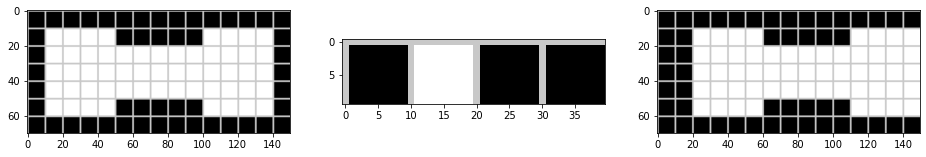

In [5]:
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(drawMatrix(src),cmap='gray')
plt.subplot(132)
plt.imshow(drawMatrix(kernel*255.0),cmap='gray')
plt.subplot(133)
plt.imshow(drawMatrix(result),cmap='gray')

In [6]:
def erod(img,kernel):
    ksize = kernel.shape
    center=(int(ksize[0]/2),int(ksize[1]/2))
    img_pad = cv2.copyMakeBorder(src,center[0],center[0],center[1],center[1],borderType=cv2.BORDER_CONSTANT,value=0)
    new_img = np.zeros_like(img)
    ele_idx = np.argwhere(kernel==1)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            block = img_pad[i:i+ksize[0],j:j+ksize[1]]
            if(block[ele_idx[...,0],ele_idx[...,1]].all()==1):
                new_img[i,j] = 1
            else:
                new_img[i,j] = 0
    return img_pad,new_img

In [7]:
pad_img,new_img = erod(src,kernel)

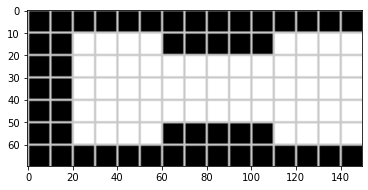

In [8]:
plt.imshow(drawMatrix(new_img*255.0),cmap='gray')